# Let's make a web scraper!

## Goals: 
- Get data from a few websites, perhaps 100 images first, with the surrounding context (closest tag to them, class names, image names, parent tag, closest p for textual context and how far it is perhaps?)

## How to:
- Collect website names, just go for random 50 websites
- Scrape them, analyze (wholly)
- Decide which parts to take
- Compile to json

## To do:
- Compile a list of websites with a more diverse role
- Scrape parent tag
- Scrape textual content
- Compile to JSON or smth else

In [5]:
%pip install requests beautifulsoup4 matplotlib numpy pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [33]:
websites = [
    "https://www.bbc.co.uk/news",
    "https://www.theguardian.com/uk",
    # "https://www.telegraph.co.uk/",
    # "https://www.congress.gov/",
    # "https://www.trendmicro.com/en_id/business.html",
    # "https://www.independent.co.uk/",
    # "https://www.mirror.co.uk/",
    # "https://www.express.co.uk/",
    # "https://www.dailymail.co.uk/",
    # "https://www.thesun.co.uk/",
    # "https://www.thetimes.co.uk/",
    # "https://www.ft.com/",
    # "https://www.economist.com/",
    # "https://www.newstatesman.com/",
    # "https://www.spectator.co.uk/",
    # "https://www.huffingtonpost.co.uk/",
    # "https://www.politico.eu/",
    # "https://www.aljazeera.com/",
    # "https://www.rt.com/",
    # "https://www.dw.com/",
    # "https://www.france24.com/",
    # "https://www.euronews.com/",
    # "https://www.bild.de/",
    # "https://www.spiegel.de/",
    # "https://www.faz.net/",
    # "https://www.welt.de/",
    # "https://www.taz.de/",
    # "https://www.zeit.de/",
]

In [34]:
# Function to label image manually

import requests
from urllib.parse import urljoin
from io import BytesIO
import requests
import matplotlib.pyplot as plt
from PIL import Image


def label_image(image_url, image_alt):
    # Download the image
    image_res = requests.get(image_url)
    # Display the image
    image = Image.open(BytesIO(image_res.content))
    plt.imshow(image)
    plt.title(f'Current alt: {image_alt}')
    plt.axis("off")
    # Set bg color to gray
    ax = plt.gca()
    ax.set_facecolor('gray')
    plt.show()
    # Manually label the data
    # 1. Role
    #   1: Informative (images that graphically represent concepts and information, typically pictures, photos, and illustrations.)
    #   2: Decorative (the only purpose of an image is to add visual decoration to the page)
    #   3: Functional (image used as a link or as a button, should describe the functionality of the link or button rather than the visual image)
    #   4: Text (readable text)
    #   5: Complex (diagrams or graphs)
    role = input("Role of image (1-5): ")
    # A shortcut to skip the image, input '0' for role
    if (role == '0'):
        return None
    # A shortcut to cut the loop, input 'q' for role
    if (role == 'q'):
        return 'q'
    
    # 2. New alt text, if previous alt text is not descriptive enough
    new_alt = input("New alt text: ")

    # 3. If the image has a readable text, input the text
    text = input("Text in image (if any): ")

    # 4. If the image has a known entity, input the entity
    entity = input("Entity in image (if any, comma separated): ")

    # Parse the data
    if (role == '1'):
        role = 'informative'
    elif (role == '2'):
        role = 'decorative'
    elif (role == '3'):
        role = 'functional'
    elif (role == '4'):
        role = 'text'
    elif (role == '5'):
        role = 'complex'
    else:
        role = 'unknown'

    if (new_alt == ''):
        new_alt = image_alt

    entity = entity.split(',')

    data = {
        'role': role,
        'alt': new_alt,
    }

    return (data)

Image 12 of 74, website 1 of 2
[]
[<source sizes="(max-width: 399px) 240px, 480px" srcset="https://ichef.bbci.co.uk/ace/standard/240/cpsprodpb/ba1a/live/eeb5de60-46c6-11ef-b74c-bb483a802c97.jpg.webp 240w, https://ichef.bbci.co.uk/ace/standard/480/cpsprodpb/ba1a/live/eeb5de60-46c6-11ef-b74c-bb483a802c97.jpg.webp 480w" type="image/webp"/>]


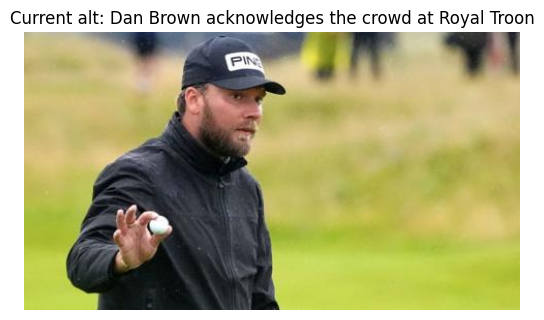

FileNotFoundError: [Errno 2] No such file or directory: './output/https://www.bbc.co.uk/news.json'

In [39]:
import requests
from bs4 import BeautifulSoup
import json
from IPython.display import clear_output
import webbrowser

i_website = 1
for URL in websites:
    # Initialize the list to store the image data
    images_info = []
    # Open the URL in a new tab for reference while labelling
    webbrowser.open_new_tab(URL)
    # Get the HTML content of the page
    page = requests.get(URL)
    # Parse the HTML content
    soup = BeautifulSoup(page.content, "html.parser")
    # Find all 'img' tags
    images = soup.find_all("img")
    # Remove duplicates
    images = set(images)

    i_image = 1
    for image in images:
        try:
            # GET RELEVANT DATA OF THE IMAGE
            # Clear the output before displaying the next image to avoid an overly big notebook size
            clear_output(wait=True)
            print(f"Image {i_image} of {len(images)}, website {i_website} of {len(websites)}")
            # The 'src' attribute of the image
            image_url = image["src"]
            # Error handling
            if not image_url.startswith(('http://', 'https://')):
                image_url = urljoin(URL, image_url)
            # The 'alt' attribute of the image
            image_alt = image.get("alt", "No alt attribute")  # Use a default value if 'alt' is missing
            # The other attributes of the image
            image_attrs = image.attrs
            # Find out if image has <a> parent or <button> parent, potentially indicating a functional image
            # a_parent_found = False
            # # Loop up to 6 levels up the hierarchy
            # for _ in range(6):
            #     # Try to find a parent <a> tag
            #     a_parent = current_tag.find_parent('a')
            #     if a_parent:
            #         # If an <a> parent is found, set the flag to True and break the loop
            #         a_parent_found = True
            #         break
            #     else:
            #         # If not found, move up to the next parent
            #         current_tag = current_tag.parent
            #         # If the current tag is None (top of the tree), break the loop
            #         if current_tag is None:
            #             break

            # Extract sibling tags of the image
            next_siblings = [sibling for sibling in image.find_next_siblings()]
            previous_siblings = [sibling for sibling in image.find_previous_siblings()]
            print(next_siblings)
            print(previous_siblings)

            # LABELLING
            # Label the image manually
            data = label_image(image_url, image_alt)
            if data == 'q':
                break
            # Write the data (image and labels) to a file
            if data is not None:
                images_info.append({
                    "src": image_url,
                    "role": data['role'],
                    "alt": data['alt'],
                    "attrs": image_attrs,
                })
            
        except KeyError:
            pass  # Skip images without 'src' or 'alt'
        except requests.exceptions.MissingSchema:
            pass  # Skip URLs without a schema
        except Exception as e:
            print(f"An error occurred: {e}")

        i_image += 1

    # Step 4: Write the list to a file in JSON format
    with open(f"./output/{URL}.json", "w") as f:
        json.dump(images_info, f, indent=4)

    i_website += 1

# Create the AI

In [2]:
# installing some dependencies, CLIP was released in PyTorch
import subprocess

# CUDA_version = [s for s in subprocess.check_output(["nvcc", "--version"]).decode("UTF-8").split(", ") if s.startswith("release")][0].split(" ")[-1]
# print("CUDA version:", CUDA_version)

# if CUDA_version == "10.0":
#     torch_version_suffix = "+cu100"
# elif CUDA_version == "10.1":
#     torch_version_suffix = "+cu101"
# elif CUDA_version == "10.2":
#     torch_version_suffix = ""
# else:
#     torch_version_suffix = "+cu110"

%pip install torch==1.7.1+cpu torchvision==0.8.2+cpu -f https://download.pytorch.org/whl/torch_stable.html

import numpy as np
import torch

print("Torch version:", torch.__version__)

Defaulting to user installation because normal site-packages is not writeable
Looking in links: https://download.pytorch.org/whl/torch_stable.html
DEPRECATION: The HTML index page being used (https://download.pytorch.org/whl/torch_stable.html) is not a proper HTML 5 document. This is in violation of PEP 503 which requires these pages to be well-formed HTML 5 documents. Please reach out to the owners of this index page, and ask them to update this index page to a valid HTML 5 document. pip 22.2 will enforce this behaviour change. Discussion can be found at https://github.com/pypa/pip/issues/10825
ERROR: Could not find a version that satisfies the requirement torch==1.7.1+cpu (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.1

In [6]:
%pip install gdown ftfy regex

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 KB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
# clone the CLIP repository
!git clone https://github.com/openai/CLIP.git

import sys
from pathlib import Path

clip_dir = Path(".").absolute() / "CLIP"
sys.path.append(str(clip_dir))
print(f"CLIP dir is: {clip_dir}")

import clip

fatal: destination path 'CLIP' already exists and is not an empty directory.
CLIP dir is: /home/felinejtd/projects/itb/ta/image-alt-text-ai/CLIP


In [9]:
# Load pre-trained model
import os

device = "cuda" if torch.cuda.is_available() else "cpu"
model, transform = clip.load("ViT-B/32", device=device)
print(f"Model dir: {os.path.expanduser('~/.cache/clip')}")

Model dir: /home/felinejtd/.cache/clip
